In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lidar = pd.read_csv('../data/test_f5_fg/lidar.txt', sep=' ', header=None)
actions = pd.read_csv('../data/test_f5_fg/actions.txt', sep=' ', header=None)
actions.columns= ['steering_angle', 'velocity']
print("actions ", actions.shape)
print("Lidar ",lidar.shape)


actions  (1407, 2)
Lidar  (1407, 1081)


In [17]:
def plot_vel():
    #fig, ax = plt.subplots(figsize=(16,10))
    sns.lineplot(data=actions['steering_angle'])

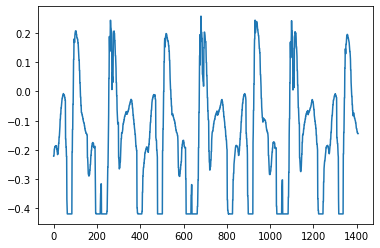

In [18]:
plot_vel()

actions  (1407, 2)
Lidar  (1407, 1081)


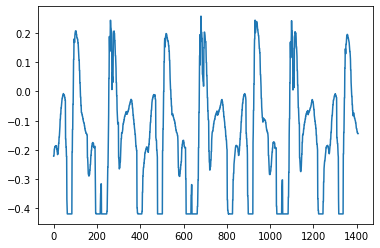

In [19]:
negative_vel = actions.loc[actions['velocity'] <= 0.0]
actions = actions.drop(negative_vel.index)
lidar = lidar.drop(negative_vel.index)
print("actions ", actions.shape)
print("Lidar ",lidar.shape)
plot_vel()

In [20]:
def write_output_to_csv():
    output = lidar.copy()
    output['velocity'] = actions['velocity'].copy()
    output['steering_angle'] = actions['steering_angle'].copy()
    output.to_csv(r'../data/Dataset_refined/test_f5_fg.csv', index=False, header=True)

In [21]:
write_output_to_csv()

In [38]:
#Combine all bags
dataset = pd.read_csv('../data/Dataset_refined/complete.csv', sep=',')
dataset = dataset.append(pd.read_csv('../data/Dataset_refined/big_teach_data_fast.csv', sep=','))


In [ ]:
dataset.to_csv(r'../data/Dataset_refined/complete.csv', index=False, header=True)

In [14]:
complete = pd.read_csv('../data/Dataset_refined/test_f5_fg.csv', sep=',')

In [23]:
complete['steering_angle'].shape

-0.4189

In [12]:
#clip impossible turns (wrong with follow the wall...)
for i in range(len(complete)):
    if complete['steering_angle'][i] > 0.4189:
        complete['steering_angle'][i] = 0.4189
    elif complete['steering_angle'][i] < -0.4189:
        complete['steering_angle'][i] = -0.4189

In [13]:
complete.to_csv(r'../data/Dataset_refined/test_f5.csv', index=False, header=True)